In [2]:
#line
import cv2
cv2.destroyAllWindows()
import matplotlib.patches as patches
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from sunpy.coordinates import frames
import sunpy.map
import numpy as np
from astropy.io import fits
import sunpy.visualization.colormaps as cm
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
#Areas
# How many image sets will you compare
global COMP_NUM
COMP_NUM = 2
global BOUNDARY
BOUNDARY = 40

# List to store points
points = []

# Callback function for mouse events
def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        points.append((x, y))

image_save_path = ''
date = ''
AIA_path = '/AIA/{}/2023-04-04T000545_171.fits'.format(date) #Plot
AIA_path_ROI = '/AIA/{}/2023-04-04T000545_171.fits'.format(date) #ROI
EUI_path = '/EUI_Gen/{}/2023-04-04T0000_174.fits'.format(date) #EUI_ref

ROI_NUM = 'comp_5' #Save name

AIA_fits = fits.open(AIA_path_ROI)
AIA_image = AIA_fits[0].data
AIA_image = (2**(AIA_image*7+7))
image = AIA_image * (5/np.max(AIA_image))

# Create a window and set the callback function
cv2.namedWindow('image')
cv2.setMouseCallback('image', click_event)

# Display the image and draw the ROI
while True:
    clone = image.copy()
    if len(points) > 1:
        cv2.polylines(clone, [np.array(points)], False, (0, 255, 0), 1)
    cv2.imshow('image', clone)
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        shape_completed = True
    if key == ord('q') and len(points) > 2:
        break
cv2.destroyAllWindows()

# Create a mask
mask = np.zeros(image.shape[:2], dtype="uint8")

# Check if the number of points is sufficient to draw a polygon
if len(points) > 2:
    cv2.fillPoly(mask, [np.array(points)], 255)

    # Get ROI
    ROI = cv2.bitwise_and(image, image, mask=mask)
    cv2.imshow('ROI', ROI)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Please select at least three points to form a closed shape.")
    
ROI = np.where(mask >254 ) 


_p = np.array(points)
vertex = np.append(_p,[_p[0]],axis = 0)
print(vertex[:,0])

QObject::moveToThread: Current thread (0x3177c10) is not the object's thread (0x3a5ede0).
Cannot move to target thread (0x3177c10)

QObject::moveToThread: Current thread (0x3177c10) is not the object's thread (0x3a5ede0).
Cannot move to target thread (0x3177c10)

QObject::moveToThread: Current thread (0x3177c10) is not the object's thread (0x3a5ede0).
Cannot move to target thread (0x3177c10)

QObject::moveToThread: Current thread (0x3177c10) is not the object's thread (0x3a5ede0).
Cannot move to target thread (0x3177c10)

QObject::moveToThread: Current thread (0x3177c10) is not the object's thread (0x3a5ede0).
Cannot move to target thread (0x3177c10)

QObject::moveToThread: Current thread (0x3177c10) is not the object's thread (0x3a5ede0).
Cannot move to target thread (0x3177c10)

QObject::moveToThread: Current thread (0x3177c10) is not the object's thread (0x3a5ede0).
Cannot move to target thread (0x3177c10)

QObject::moveToThread: Current thread (0x3177c10) is not the object's thread

QObject::moveToThread: Current thread (0x3177c10) is not the object's thread (0x3a5ede0).
Cannot move to target thread (0x3177c10)

QObject::moveToThread: Current thread (0x3177c10) is not the object's thread (0x3a5ede0).
Cannot move to target thread (0x3177c10)

QObject::moveToThread: Current thread (0x3177c10) is not the object's thread (0x3a5ede0).
Cannot move to target thread (0x3177c10)

QObject::moveToThread: Current thread (0x3177c10) is not the object's thread (0x3a5ede0).
Cannot move to target thread (0x3177c10)

QObject::moveToThread: Current thread (0x3177c10) is not the object's thread (0x3a5ede0).
Cannot move to target thread (0x3177c10)

QObject::moveToThread: Current thread (0x3177c10) is not the object's thread (0x3a5ede0).
Cannot move to target thread (0x3177c10)

QObject::moveToThread: Current thread (0x3177c10) is not the object's thread (0x3a5ede0).
Cannot move to target thread (0x3177c10)

QObject::moveToThread: Current thread (0x3177c10) is not the object's thread

[531 546 550 537 527 531]


/userhome/youn_j/anaconda3/envs/youn_j/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


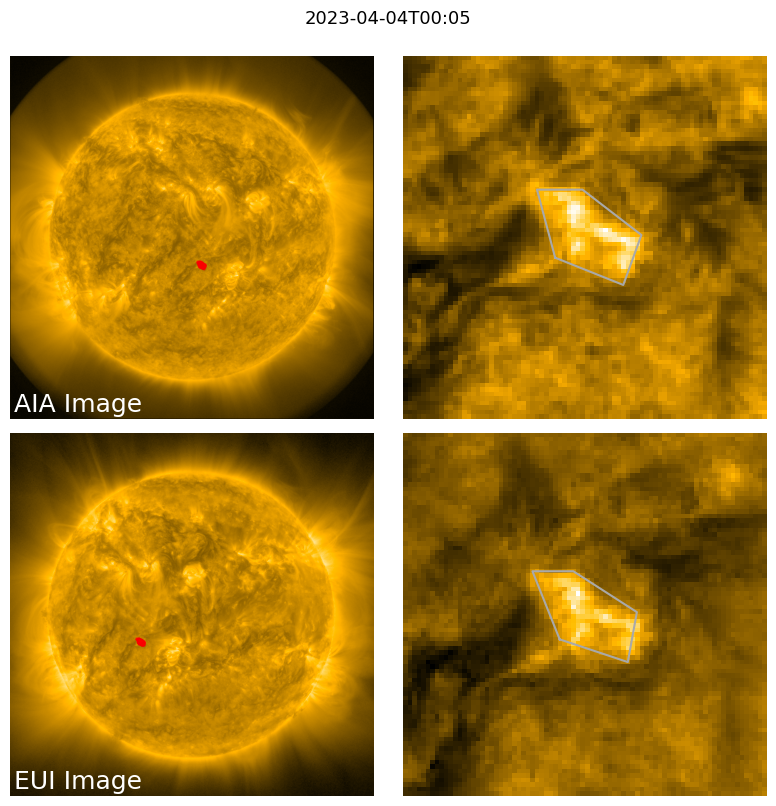

In [4]:

plt.figure(figsize=(8, 8))

#   ============================================================================================
# Load the AIA FITS file
AIA_fits = fits.open(AIA_path)
AIA_data = AIA_fits[0].data
AIA_hdr = AIA_fits[0].header
AIA_hdr['cunit1'] = 'arcsec' 
AIA_hdr['cunit2'] = 'arcsec'
AIA_hdr["crval1"] = 0
AIA_hdr["crval2"] = 0
AIA_hdr["pc1_1"] = 1
AIA_hdr["pc1_2"] = 0
AIA_hdr["pc2_1"] = 0
AIA_hdr["pc2_2"] = 1

#Prep
AIA_data = np.clip(AIA_data,-1,2)
AIA_data = (2**(AIA_data*7+7))

#Coordinate setting by radian unit
m = sunpy.map.Map(AIA_data, AIA_hdr)
AIA_heliographic_coord = sunpy.map.all_coordinates_from_map(m).transform_to(frames.HeliographicCarrington)
ROI_x_pix = ROI[1]
ROI_y_pix = ROI[0]
AIA_vertex_x_pix = vertex[:,0]
AIA_vertex_y_pix = vertex[:,1]

# Generate degree data
AIA_lon_deg = AIA_heliographic_coord.lon.T[ROI_x_pix, ROI_y_pix].value
AIA_lat_deg = AIA_heliographic_coord.lat.T[ROI_x_pix, ROI_y_pix].value
AIA_vertex_lon_deg = AIA_heliographic_coord.lon.T[AIA_vertex_x_pix, AIA_vertex_y_pix].value
AIA_vertex_lat_deg = AIA_heliographic_coord.lat.T[AIA_vertex_x_pix, AIA_vertex_y_pix].value
plt.text(10, 20, 'AIA Image', color='white', fontsize=18)

# Convert to radian
AIA_lon_rad = np.deg2rad(AIA_lon_deg)
AIA_lat_rad = np.deg2rad(AIA_lat_deg)
AIA_vertex_lon_rad = np.deg2rad(AIA_vertex_lon_deg)
AIA_vertex_lat_rad = np.deg2rad(AIA_vertex_lat_deg)

plt.tight_layout()
plt.subplot(2,2,1)
plt.text(10, 20, 'AIA Image', color='white', fontsize=18)
plt.imshow(np.log10(AIA_data), cmap = 'sdoaia171', origin='lower',vmin=0,vmax=4)
plt.scatter(ROI_x_pix,ROI_y_pix, s = .1,  c='r', marker = 'o', alpha = 0.5)

ref_aia_y = np.uint(np.median(ROI_y_pix))
ref_aia_x = np.uint(np.median(ROI_x_pix))

AIA_slice = AIA_data[np.uint(ref_aia_y - BOUNDARY):np.uint(ref_aia_y +BOUNDARY),
                      np.uint(ref_aia_x-BOUNDARY):np.uint(ref_aia_x+ BOUNDARY)]
plt.axis('off')

plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.1)

plt.subplot(2,2,2)
plt.imshow(np.log10(AIA_slice), cmap = 'sdoaia171', origin='lower')

plt.plot(vertex[:,0]-ref_aia_x+BOUNDARY,vertex[:,1]-ref_aia_y+BOUNDARY, c='darkgray')

plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(wspace=.1, hspace=.1)
plt.xticks([]), plt.yticks([])



#   ============================================================================================
# Load the EUI FITS file

EUI_fits = fits.open(EUI_path)

EUI_data = EUI_fits[0].data
EUI_hdr = EUI_fits[0].header
EUI_hdr['cunit1'] = 'arcsec' 
EUI_hdr['cunit2'] = 'arcsec'
EUI_hdr["crval1"] = 0
EUI_hdr["crval2"] = 0
EUI_hdr["euxcen"] = 512
EUI_hdr["euycen"] = 512
EUI_hdr["pc1_1"] = 1
EUI_hdr["pc1_2"] = 0
EUI_hdr["pc2_1"] = 0
EUI_hdr["pc2_2"] = 1

m = sunpy.map.Map((EUI_data, EUI_hdr))
EUI_heliographic_coord = sunpy.map.all_coordinates_from_map(m).transform_to(frames.HeliographicCarrington)

EUI_lon_deg = EUI_heliographic_coord.lon.value.T
EUI_lat_deg = EUI_heliographic_coord.lat.value.T
EUI_lon_rad = np.deg2rad(EUI_lon_deg)
EUI_lat_rad = np.deg2rad(EUI_lat_deg)
EUI_lon_rad = np.float32(np.nan_to_num(EUI_lon_rad))
EUI_lat_rad = np.float32(np.nan_to_num(EUI_lat_rad))

ROI_EUI = []
ROI_EUI_x = []
ROI_EUI_y = []

con_EUI = []
con_EUI_x = []
con_EUI_y = []


for i in range(len(AIA_lon_rad)):
    loc = np.sqrt((EUI_lon_rad-AIA_lon_rad[i])**2 + (EUI_lat_rad-AIA_lat_rad[i])**2)
    ROI_EUI.append(np.where(loc == np.nanmin(loc)))
    ROI_EUI_x.append(ROI_EUI[i][0])
    ROI_EUI_y.append(ROI_EUI[i][1])

for j in range(len(AIA_vertex_lon_rad)):
    loc = np.sqrt((EUI_lon_rad-AIA_vertex_lon_rad[j])**2 + (EUI_lat_rad-AIA_vertex_lat_rad[j])**2)
    con_EUI.append(np.where(loc == np.nanmin(loc)))
    con_EUI_x.append(con_EUI[j][0])
    con_EUI_y.append(con_EUI[j][1])

    
# Prep
EUI_image = np.clip(EUI_data,-1,2) 
EUI_image = (2**(EUI_image*7+7)) 

#bias, this may be the correction of jitter from SO or else
x_bias = -5
y_bias = -3

ROI_EUI_x = np.array(ROI_EUI_x)+x_bias
ROI_EUI_y = np.array(ROI_EUI_y)+y_bias
con_EUI_x = np.array(con_EUI_x)+x_bias
con_EUI_y = np.array(con_EUI_y)+y_bias


plt.subplot(2,2,3)
plt.imshow(np.log10(EUI_image), cmap = 'sdoaia171', origin = 'lower',vmin=0,vmax=4)
plt.text(10, 20, 'EUI Image', color='white', fontsize=18)
plt.scatter(ROI_EUI_x,ROI_EUI_y, s = .1,  c='r', marker = 'o' , alpha = .5)

plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(wspace=.1, hspace=.1)
plt.xticks([]), plt.yticks([])

ref_eui_y = np.uint(np.median(ROI_EUI_y))
ref_eui_x = np.uint(np.median(ROI_EUI_x))

EUI_slice = EUI_image[np.uint(ref_eui_y - BOUNDARY):np.uint(ref_eui_y +BOUNDARY),
                      np.uint(ref_eui_x-BOUNDARY):np.uint(ref_eui_x+ BOUNDARY)]

plt.subplot(2,2,4)
plt.imshow(np.log10(EUI_slice), cmap = 'sdoaia171', origin='lower')

plt.plot(con_EUI_x-ref_eui_x+BOUNDARY,con_EUI_y-ref_eui_y+BOUNDARY, c='darkgray')##########################

plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.subplots_adjust(wspace=.1, hspace=.1)

plt.suptitle('{}'.format(AIA_hdr['date-obs'][:16]), fontsize=13, y=1)# y 값으로 제목의 상대적 위치 조정
plt.tight_layout(pad=1)
plt.savefig(image_save_path+'{}'.format(date+'_ROI_plot_'+ROI_NUM))
        
plt.show()


In [5]:
from sunpy.map import Map
from astropy import units as u, time as time
import numpy as np
from aiapy.calibrate import degradation, register, update_pointing, correct_degradation
from aiapy.calibrate.util import get_correction_table 
from glob import glob
import astropy.io.fits as fits

import math
import matplotlib.pyplot as plt
import scipy.io as io
from demregpy import dn2dem
import demregpy

from astropy.coordinates import SkyCoord
from astropy.time import Time



# COMP_NUM = 2
input_folder_AIA = '/AIA/{}/'.format(date)
input_folder_EUI = '/EUI_Gen/{}/'.format(date)

# COMP_NUM = 3
# input_folder_AIA_g = '/AIA_Gen/{}/'.format(date)


def restore(maps):
    _tmp_data = maps.data
    _tmp_hdr = maps.meta
    _tmp_data = np.clip(_tmp_data,-1,2)
    _tmp_data = (2**(_tmp_data*7+7))-1
    _tmp_MAP = Map(_tmp_data, _tmp_hdr)        
    return _tmp_MAP

def DEM_SET(input_folder):

    file_path = input_folder+'*fits'
    files = sorted(glob(file_path)) 
    maps = []
    
    for _tmp in files:
        fits_data = fits.open(_tmp)
        image = fits_data[0].data
        hdr = fits_data[0].header
        hdr['cunit1'] = 'arcsec' 
        hdr['cunit2'] = 'arcsec'
        hdr["crval1"] = 0
        hdr["crval2"] = 0
        hdr["euxcen"] = 512
        hdr["euycen"] = 512
        hdr["pc1_1"] = 1
        hdr["pc1_2"] = 0
        hdr["pc2_1"] = 0
        hdr["pc2_2"] = 1
        mapping = Map(image, hdr)
        maps.append(mapping)
        print(_tmp)
    maps = [restore(m) for m in maps] 
    
    return maps


def setting(maps, inst):
    nx=int(maps[0].dimensions.x.value)
    ny=int(maps[0].dimensions.y.value)
    nf=6
    data=np.zeros([nx,ny,nf])
    #convert from our list to an array of data
    for j in np.arange(nf):
        data[:,:,j]=maps[j].data
    data[data < 0]=0
    serr_per=10.0 # ??
    #errors in dn/px/s
    edata=np.zeros([nx,ny,nf])
    if inst == 'AIA':
        gains=np.array([18.3,17.6,17.7,18.3,18.3,17.6])
        dn2ph=gains*[94,131,171,193,211,335]/3397.0   # 12398/3.65 ~ 3397 (Boerner et al. 2012)
        rdnse=np.array([1.14,1.18,1.15,1.20,1.20,1.18])
        npix= 1 #1024.**2/(nx*ny)
        
        
    if inst == 'EUI':
        gains=np.array([18.3,17.6,31.025,18.3,18.3,17.6])
        dn2ph=gains*[94,131,174,193,211,335]/3397.0   # 12398/3.65 ~ 3397 (Boerner et al. 2012)
#         dn2ph[2]=gains[2]*174/1810.0 # 12398/6.85 ~ 1810 (174, https://www.sidc.be/EUI/data/latest_release_notes.html)
        dn2ph[2]=gains[2]*174/1696 # 12398/7.31 ~ 1810 (174, referenced by Frederic)
        rdnse=np.array([1.14,1.18,2.0,1.20,1.20,1.18]) #(174, https://www.sidc.be/EUI/data/latest_release_notes.html)
        npix= 1 #1024.**2/(nx*ny)

    drknse=0.17
    qntnse=0.288819*np.sqrt(npix)/npix
    
    for j in np.arange(nf):
        etemp=np.sqrt(rdnse[j]**2.+drknse**2.+qntnse**2.+(dn2ph[j]*data[:,:,j] * npix)/(npix*dn2ph[j]**2))
        esys=serr_per*data[:,:,j]/100.
        edata[:,:,j]=np.sqrt(etemp**2. + esys**2.)
        
    return data, edata

def get_dem(data, edata, tresp_logt,inst, y1= 0, y2= 1024, x1= 0, x2= 1024, nt = 21):

#     temperatures=10**np.linspace(4.925,8,num=21)
    temperatures=10**np.arange(4+0.05,8-0.05,0.1)
    mlogt=([np.mean([(np.log10(temperatures[i])),np.log10((temperatures[i+1]))]) \
            for i in np.arange(0,len(temperatures)-1)])
    
    if inst == 'AIA':
        print('AIA_trmatrix')
        dem,edem,elogt,chisq,dn_reg=dn2dem(data[y1:y2,x1:x2,:],edata[y1:y2,x1:x2,:],
                                           AIA_trmatrix,tresp_logt,temperatures)
    elif inst == 'EUI':
        print('EUI_trmatrix')
        dem,edem,elogt,chisq,dn_reg=dn2dem(data[y1:y2,x1:x2,:],edata[y1:y2,x1:x2,:],
                                           EUI_trmatrix,tresp_logt,temperatures)
        
    elif inst == 'EUI2':
        print('EUI_trmatrix')
        dem,edem,elogt,chisq,dn_reg=dn2dem(data[y1:y2,x1:x2,:],edata[y1:y2,x1:x2,:],
                                           EUI_trmatrix2,tresp_logt,temperatures)
    return dem,edem,elogt,chisq,dn_reg,mlogt



AIAs = DEM_SET(input_folder_AIA)
EUIs = DEM_SET(input_folder_EUI)

AIA_DN_data, AIA_edata = setting(AIAs, 'AIA')
EUI_DN_data, EUI_edata = setting(EUIs, 'EUI')


AIA_trin= np.load('/resp_concat_AIA_rev1.npy')

EUI_trin= np.load('/resp_concat_FSI_factor0.7_rev1.npy')
# EUI_trin2 = np.load('/resp_concat_FSI_factor0.7_rev1.npy')


tresp_logt = np.linspace(4,8,81) 
nt=len(tresp_logt) 
nf = 6
AIA_trmatrix=np.zeros((nt,nf)) #array
EUI_trmatrix=np.zeros((nt,nf)) 
# EUI_trmatrix2=np.zeros((nt,nf)) 

for i in range(6):
    AIA_trmatrix[:,i]=AIA_trin[i]
    EUI_trmatrix[:,i]=EUI_trin[i]
#     EUI_trmatrix2[:,i]=EUI_trin2[i]
# Temperature bin of response ft. [94A, 131, ~~~, ],respectively

AIA_dem,AIA_edem,AIA_elogt,AIA_chisq,AIA_dn_reg,AIA_mlogt = get_dem(AIA_DN_data, AIA_edata, tresp_logt,'AIA',
                                                                    y1 = np.uint(ref_aia_y - BOUNDARY),
                                                                    y2 = np.uint(ref_aia_y + BOUNDARY),
                                                                    x1 = np.uint(ref_aia_x - BOUNDARY),
                                                                    x2 = np.uint(ref_aia_x + BOUNDARY))
EUI_dem,EUI_edem,EUI_elogt,EUI_chisq,EUI_dn_reg,EUI_mlogt = get_dem(EUI_DN_data, EUI_edata, tresp_logt,'EUI',
                                                                    y1 = np.uint(ref_eui_y - BOUNDARY),
                                                                    y2 = np.uint(ref_eui_y + BOUNDARY),
                                                                    x1 = np.uint(ref_eui_x - BOUNDARY),
                                                                    x2 = np.uint(ref_eui_x + BOUNDARY))


# ================================================================

# AIA_g_dem=AIA_g_edem=AIA_g_elogt=AIA_g_chisq=AIA_g_dn_reg=AIA_g_mlogt = 0.

if COMP_NUM == 3:
    AIA_g_dem,AIA_g_edem,AIA_g_elogt,AIA_g_chisq,AIA_g_dn_reg,AIA_g_mlogt  = get_dem(EUI_data, EUI_edata, tresp_logt,'EUI2',
                                                                    y1 = np.uint(ref_eui_y - BOUNDARY),
                                                                    y2 = np.uint(ref_eui_y + BOUNDARY),
                                                                    x1 = np.uint(ref_eui_x - BOUNDARY),
                                                                    x2 = np.uint(ref_eui_x + BOUNDARY))
#     AIA_gs = DEM_SET(input_folder_AIA_g)
#     AIA_g_data, AIA_g_edata = setting(AIA_gs, 'AIA')
#     AIA_g_dem,AIA_g_edem,AIA_g_elogt,AIA_g_chisq,AIA_g_dn_reg,AIA_g_mlogt = get_dem(AIA_g_data, AIA_g_edata, tresp_logt,'AIA',
#                                                                         y1 = np.uint(ref_aia_y - BOUNDARY), y2 = np.uint(ref_aia_y + BOUNDARY),
#                                                                         x1 = np.uint(ref_aia_x - BOUNDARY), x2 = np.uint(ref_aia_x + BOUNDARY))

/userhome/youn_j/DEM/DEM_testsetV240610/AIA/20230404T0000/2023-04-04T000545_094.fits
/userhome/youn_j/DEM/DEM_testsetV240610/AIA/20230404T0000/2023-04-04T000545_131.fits
/userhome/youn_j/DEM/DEM_testsetV240610/AIA/20230404T0000/2023-04-04T000545_171.fits
/userhome/youn_j/DEM/DEM_testsetV240610/AIA/20230404T0000/2023-04-04T000545_193.fits
/userhome/youn_j/DEM/DEM_testsetV240610/AIA/20230404T0000/2023-04-04T000545_211.fits
/userhome/youn_j/DEM/DEM_testsetV240610/AIA/20230404T0000/2023-04-04T000545_335.fits


/userhome/youn_j/DEM/DEM_testsetV240610/EUI_Gen/20230404T0000/2023-04-04T0000_094_AI.fits
/userhome/youn_j/DEM/DEM_testsetV240610/EUI_Gen/20230404T0000/2023-04-04T0000_131_AI.fits
/userhome/youn_j/DEM/DEM_testsetV240610/EUI_Gen/20230404T0000/2023-04-04T0000_174.fits
/userhome/youn_j/DEM/DEM_testsetV240610/EUI_Gen/20230404T0000/2023-04-04T0000_193_AI.fits
/userhome/youn_j/DEM/DEM_testsetV240610/EUI_Gen/20230404T0000/2023-04-04T0000_211_AI.fits
/userhome/youn_j/DEM/DEM_testsetV240610/EUI_Gen/20230404T0000/2023-04-04T0000_335_AI.fits
AIA_trmatrix


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 64.0/64.0 [00:01<00:00, 57.7 x10^2 DEM/s]


EUI_trmatrix


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 64.0/64.0 [00:01<00:00, 59.4 x10^2 DEM/s]


In [ ]:
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import AutoMinorLocator
import matplotlib.ticker as ticker

def plot_dem_N(ax,AIA_dem, AIA_elogt, AIA_edem, AIA_mlogt,
             EUI_dem, EUI_elogt, EUI_edem, EUI_mlogt,
             AIA_g_dem = None, AIA_g_elogt= None, AIA_g_edem= None, AIA_g_mlogt= None):
#     print(np.max(AIA_dem))
    if Plot == 'log':
        yr = [1e16, np.max(EUI_dem[AIA_pos[0],AIA_pos[1]])*5]
    if Plot == 'linear':
#         yr = [1e16, (np.max(AIA_dem[AIA_pos[0],AIA_pos[1]]) + np.max(EUI_dem[EUI_pos[0],EUI_pos[1]]))/3]
        yr = [1e16,5.5e20]


    xr = [5., 7.5]
    
#     fig, ax = plt.subplots(figsize=(8, 3))
    
    
    AIA_dem_avg = []
    EUI_dem_avg = []
    AIA_g_dem_avg = []
    
    
    AIA_elogt_avg = []
    EUI_elogt_avg = []
    AIA_g_elogt_avg  = []
    
    
    AIA_edem_avg = []
    EUI_edem_avg = []
    AIA_g_edem_avg = []
    
    #ROI_EUI_x-ref_eui_x+50 ,ROI_EUI_y-ref_eui_y+50 이부분 좌표로 따야 함
    
    
    
    for i in range(len((AIA_dem[BOUNDARY, BOUNDARY,:]))):
        _tmp_aia_dem = np.average(AIA_dem[AIA_pos[0],AIA_pos[1],i])
        _tmp_eui_dem = np.average(EUI_dem[EUI_pos[0],EUI_pos[1],i])
        
        _tmp_aia_elogt = np.average(AIA_elogt[AIA_pos[0],AIA_pos[1],i])
        _tmp_eui_elogt = np.average(EUI_elogt[EUI_pos[0],EUI_pos[1],i])
        
        _tmp_aia_edem = np.average(AIA_edem[AIA_pos[0],AIA_pos[1],i])
        _tmp_eui_edem = np.average(EUI_edem[EUI_pos[0],EUI_pos[1],i])
        
    
        AIA_dem_avg.append(_tmp_aia_dem) 
        EUI_dem_avg.append(_tmp_eui_dem) 

        AIA_elogt_avg.append(_tmp_aia_elogt) 
        EUI_elogt_avg.append(_tmp_eui_elogt) 

        AIA_edem_avg.append(_tmp_aia_edem) 
        EUI_edem_avg.append(_tmp_eui_edem)
        
        
        
        if COMP_NUM == 3:
            _tmp_aia_g_dem = np.average(AIA_g_dem[AIA_pos[0],AIA_pos[1],i])
            _tmp_aia_g_elogt = np.average(AIA_g_elogt[AIA_pos[0],AIA_pos[1],i])
            _tmp_aia_g_edem = np.average(AIA_g_edem[AIA_pos[0],AIA_pos[1],i])
            AIA_g_dem_avg.append(_tmp_aia_g_dem) 
            AIA_g_elogt_avg.append(_tmp_aia_g_elogt) 
            AIA_g_edem_avg.append(_tmp_aia_g_edem)
            
            
    # EUI_gen 그래프
    ax.errorbar(EUI_mlogt, EUI_dem_avg, xerr=EUI_elogt_avg, yerr=EUI_edem_avg, fmt='-',\
                 color='purple',ecolor='violet', elinewidth=5, capsize=4, alpha = 1, label='FSI174 + AI-generated', linewidth =7)
            
#     AIA 그래프
    ax.errorbar(AIA_mlogt, AIA_dem_avg , xerr=AIA_elogt_avg, yerr=AIA_edem_avg, fmt='-',\
                color='green',ecolor='lightgreen', elinewidth=5, capsize=4, alpha = 0.7, label='AIA observation', linewidth =7)
    

    if COMP_NUM == 3:
        ax.errorbar(AIA_g_mlogt, AIA_g_dem_avg , xerr=AIA_g_elogt_avg, yerr=AIA_g_edem_avg, fmt='-g',\
                             ecolor='lightgreen', elinewidth=4, capsize=5, label='AIA_GEN')
    
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(3.5)
        
    
    ax.set_xlabel('$\mathrm{\log_{10}T\;[K]}$',fontsize=30)
    ax.set_ylabel('$\mathrm{DEM\;[cm^{-5}\;K^{-1}]}$',fontsize=30)
    
    ax.xaxis.get_offset_text().set_fontsize(30)
    ax.yaxis.get_offset_text().set_fontsize(30)

    
    ax.set_ylim(yr)
    ax.set_xlim(xr)
    
    if Plot == 'linear':
        ax.set_yscale('linear')
        ax.yaxis.set_major_formatter(FuncFormatter(exp_formatter)) 
        ax.yaxis.set_major_locator(ticker.MultipleLocator(1e20))
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        ax.tick_params(axis='both', which='minor', length=7, width=2)
        ax.tick_params(axis='both', which='major', length=12, width=3, labelsize=30)
        
        
    if Plot == 'log':
        ax.set_yscale('log')
    
    ax.legend(fontsize=30)
    

    plt.suptitle('{}'.format(AIA_hdr['date-obs'][:16]), fontsize=13, y=1)# y 값으로 제목의 상대적 위치 조정
#     plt.savefig('/Result_240325/{}'.format(date+'_'+Plot+'_plot_'+ROI_NUM))


# e.g.
# fig = plt.figure(figsize=(20,10))
# ax = fig.add_subplot()
# plot_dem_N(ax, AIA_dem, AIA_elogt, AIA_edem, AIA_mlogt, EUI_dem, EUI_elogt, EUI_edem, EUI_mlogt)

    


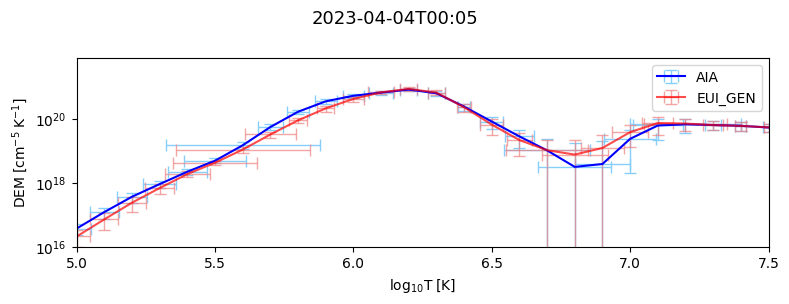

In [7]:
def UniqueArray(x_pos,y_pos):

    array = np.array([x_pos ,y_pos])
    reshaped = np.transpose(array)
    unique_array = np.unique(array, axis=0)
    
    return unique_array

AIA_pos = UniqueArray(ROI_x_pix-ref_aia_x+BOUNDARY ,ROI_y_pix-ref_aia_y+BOUNDARY)
EUI_pos = UniqueArray(ROI_EUI_x-ref_eui_x+BOUNDARY ,ROI_EUI_y-ref_eui_y+BOUNDARY)


ax = None 
Plot = 'log' #log or linear
def plot_dem(AIA_dem, AIA_elogt, AIA_edem, AIA_mlogt,
             EUI_dem, EUI_elogt, EUI_edem, EUI_mlogt,
             AIA_g_dem = None, AIA_g_elogt= None, AIA_g_edem= None, AIA_g_mlogt= None):
#     print(np.max(AIA_dem))
    if Plot == 'log':
        yr = [1e16, np.max(AIA_dem[EUI_pos[0],EUI_pos[1]])*5]
    if Plot == 'linear':
        yr = [1e16, np.max(AIA_dem[AIA_pos[0],AIA_pos[1]])*0.8]
#         yr = [1e16,6e21]


    xr = [5., 7.5]
    
    fig, ax = plt.subplots(figsize=(8, 3))
    
    
    AIA_dem_avg = []
    EUI_dem_avg = []
    AIA_g_dem_avg = []
    
    
    AIA_elogt_avg = []
    EUI_elogt_avg = []
    AIA_g_elogt_avg  = []
    
    
    AIA_edem_avg = []
    EUI_edem_avg = []
    AIA_g_edem_avg = []

  
    for i in range(len((AIA_dem[BOUNDARY, BOUNDARY,:]))):
        _tmp_aia_dem = np.average(AIA_dem[AIA_pos[0],AIA_pos[1],i])
        _tmp_eui_dem = np.average(EUI_dem[EUI_pos[0],EUI_pos[1],i])
        
        _tmp_aia_elogt = np.average(AIA_elogt[AIA_pos[0],AIA_pos[1],i])
        _tmp_eui_elogt = np.average(EUI_elogt[EUI_pos[0],EUI_pos[1],i])
        
        _tmp_aia_edem = np.average(AIA_edem[AIA_pos[0],AIA_pos[1],i])
        _tmp_eui_edem = np.average(EUI_edem[EUI_pos[0],EUI_pos[1],i])
        
    
        AIA_dem_avg.append(_tmp_aia_dem) 
        EUI_dem_avg.append(_tmp_eui_dem) 

        AIA_elogt_avg.append(_tmp_aia_elogt) 
        EUI_elogt_avg.append(_tmp_eui_elogt) 

        AIA_edem_avg.append(_tmp_aia_edem) 
        EUI_edem_avg.append(_tmp_eui_edem)
        
        
        
        if COMP_NUM == 3:
            _tmp_aia_g_dem = np.average(AIA_g_dem[AIA_pos[0],AIA_pos[1],i])
            _tmp_aia_g_elogt = np.average(AIA_g_elogt[AIA_pos[0],AIA_pos[1],i])
            _tmp_aia_g_edem = np.average(AIA_g_edem[AIA_pos[0],AIA_pos[1],i])
            AIA_g_dem_avg.append(_tmp_aia_g_dem) 
            AIA_g_elogt_avg.append(_tmp_aia_g_elogt) 
            AIA_g_edem_avg.append(_tmp_aia_g_edem) 
            
            
            
    # AIA graph
    ax.errorbar(AIA_mlogt, AIA_dem_avg , xerr=AIA_elogt_avg, yerr=AIA_edem_avg, fmt='-b',\
                 ecolor='lightskyblue', elinewidth=1, capsize=4, alpha = 1, label='AIA')
    
    # EUI_gen graph
    ax.errorbar(EUI_mlogt, EUI_dem_avg, xerr=EUI_elogt_avg, yerr=EUI_edem_avg, fmt='-r',\
                 ecolor='lightcoral', elinewidth=1, capsize=4, alpha = 0.7, label='EUI_GEN')
    
    if COMP_NUM == 3:
        ax.errorbar(AIA_g_mlogt, AIA_g_dem_avg , xerr=AIA_g_elogt_avg, yerr=AIA_g_edem_avg, fmt='-g',\
                             ecolor='lightgreen', elinewidth=1, capsize=4, label='AIA_GEN')
    
    
    ax.set_xlabel('$\mathrm{\log_{10}T\;[K]}$')
    ax.set_ylabel('$\mathrm{DEM\;[cm^{-5}\;K^{-1}]}$')
    
    ax.set_ylim(yr)
    ax.set_xlim(xr)
    if Plot == 'linear':
        ax.set_yscale('linear')
    if Plot == 'log':
        ax.set_yscale('log')
    
    ax.legend()
    

    plt.suptitle('{}'.format(AIA_hdr['date-obs'][:16]), fontsize=13, y=1)# y 값으로 제목의 상대적 위치 조정
    plt.tight_layout(pad=1.1)
    plt.savefig(image_save_path+'{}'.format(date+'_'+Plot+'_plot_'+ROI_NUM))
    plt.show()
    
if COMP_NUM == 2:
    plot_dem(AIA_dem, AIA_elogt, AIA_edem, AIA_mlogt, EUI_dem, EUI_elogt, EUI_edem, EUI_mlogt)
    
if COMP_NUM == 3:
    plot_dem(AIA_dem, AIA_elogt, AIA_edem, AIA_mlogt,
             EUI_dem, EUI_elogt, EUI_edem, EUI_mlogt,
             AIA_g_dem, AIA_g_elogt, AIA_g_edem, AIA_g_mlogt)
    

INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144 [sunpy.coordinates.ephemeris]



/userhome/youn_j/anaconda3/envs/youn_j/lib/python3.7/site-packages/ipykernel_launcher.py:186: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


/userhome/youn_j/DEM/Result/Result_vF_rev1.1/20230404T0000_Full_SET_comp_5_linear
comp_5


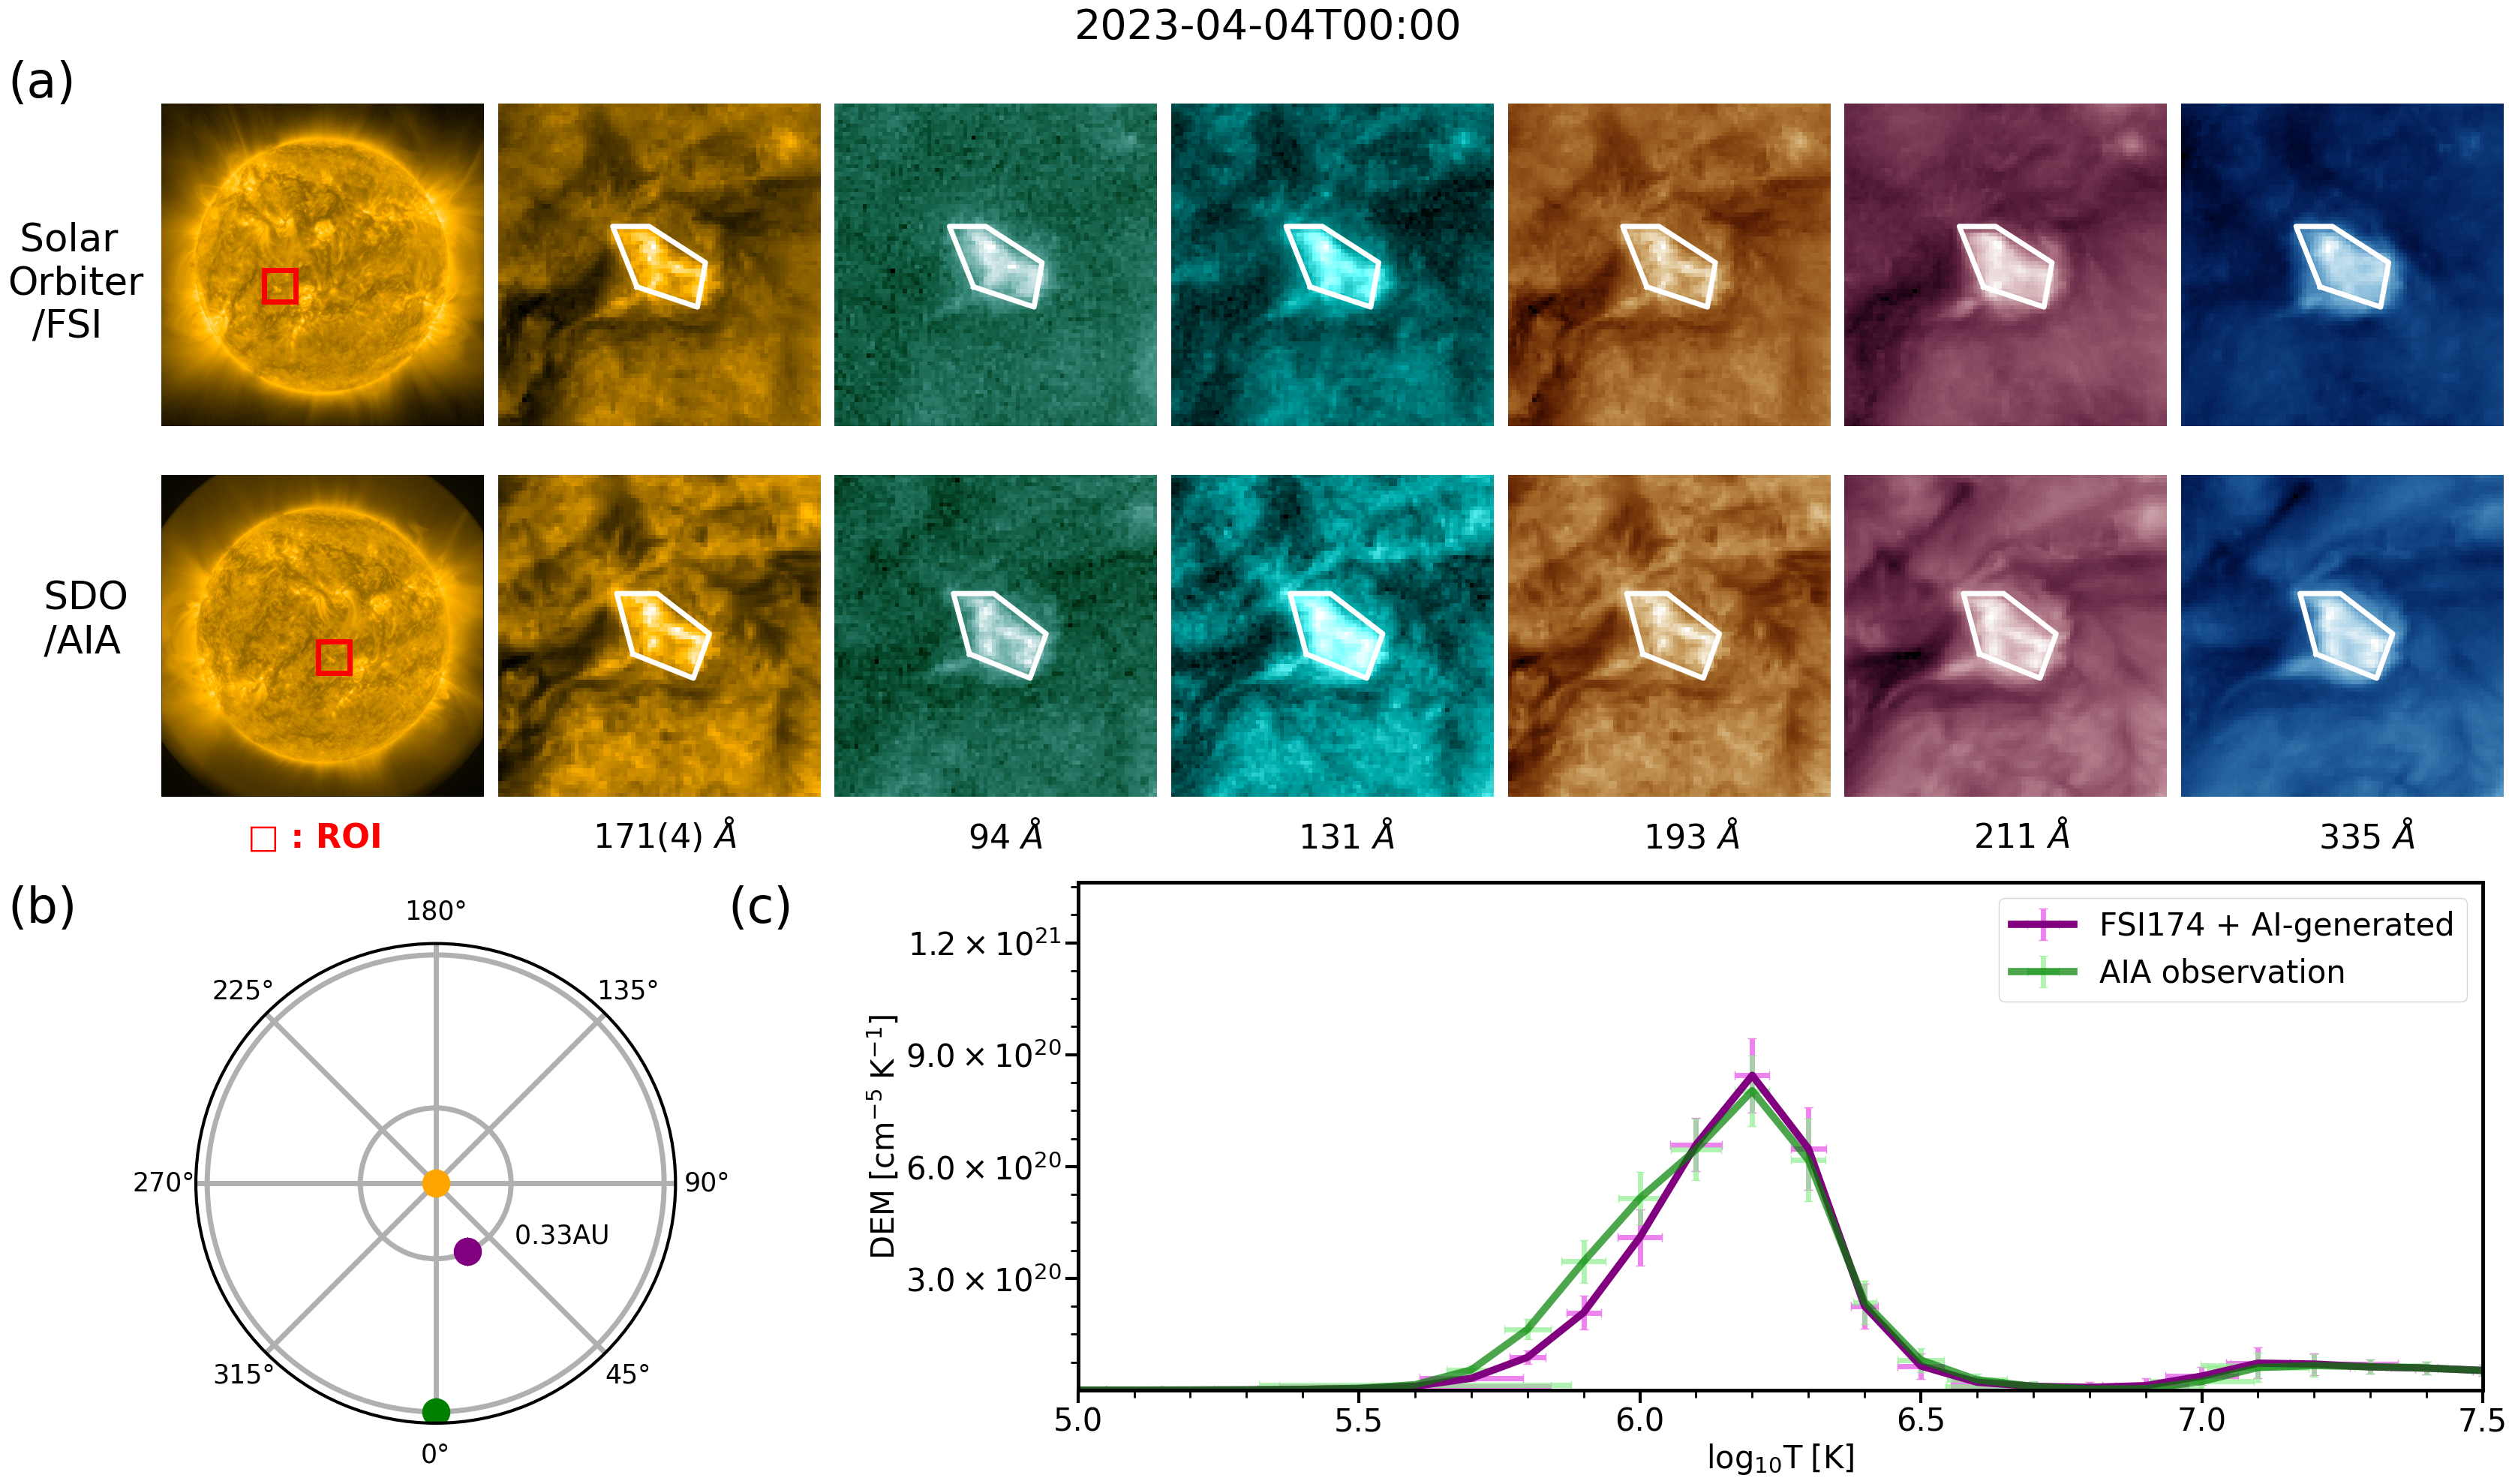

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# plt.rc('font', size=30)
from matplotlib.gridspec import GridSpec
import astropy.units as u
from sunpy.coordinates import get_body_heliographic_stonyhurst, get_horizons_coord
from sunpy.time import parse_time
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import Rectangle
Plot = 'linear' #log 

def custom_yticks(x, pos):
    if x == int(x):
        return None
    else:
        return "     "+str(round(x, 2))+"AU"

# Set up the figure and grid
fig = plt.figure(figsize=(40,20))



gs = GridSpec(4, 7, figure=fig, 
              height_ratios=[2, 2, 2, 2],  # adj. height
              width_ratios=[0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7],  # adj. col
              hspace=0.1, wspace=0.1)  # adj. space

#======================================plot1===============================================

ax1 = fig.add_subplot(gs[2:, 0:2], projection='polar')

# Define the coordinate conversion function
def coord_to_polar(coord):
    return coord.lon.to_value('rad'), coord.radius.to_value('AU')

# Set the date for the plot

plot_date = parse_time(EUIs[2].meta['date-obs'][:19])

# Get coordinates
psp = get_horizons_coord('Solar Orbiter', {'start': plot_date, 'stop': plot_date + 1 * u.day, 'step': '2d'})
earth = get_body_heliographic_stonyhurst('Earth', plot_date)


for label in ax1.get_yticklabels():
    label.set_fontsize(20)

ax1.plot(0, 0, 'o', label='Sun', color='orange', markersize=12, markeredgewidth=15)
ax1.plot(*coord_to_polar(earth), 'o', markersize=12, label='Earth (SDO)', color='Green',markeredgewidth=15)
ax1.plot(*coord_to_polar(psp), 'o', markersize=12, label='Solar Orbiter', color='Purple',markeredgewidth=15)
ax1.grid(True, linewidth=5) 
for spine in ax1.spines.values():
    spine.set_linewidth(3.0)
    
# Plot the polar data
ax1.set_theta_zero_location('S')
ax1.set_rlabel_position(30)
formatter = FuncFormatter(custom_yticks)
# ax1.set_yticks([np.round(float(coord_to_polar(psp)[1]),2), int(1)])
ax1.yaxis.set_major_formatter(formatter)
ax1.set_yticks([np.round(float(coord_to_polar(psp)[1]),2), int(1)]) 
ax1.tick_params(axis='both', which='major', labelsize=25)
    
pos_ax1 = ax1.get_position()
new_pos_ax1 = [pos_ax1.x0, pos_ax1.y0*0.33 , pos_ax1.width * 0.90, pos_ax1.height * 0.85] # width를 줄여서 padding 효과를 냅니다.
ax1.set_position(new_pos_ax1)

ax1.tick_params(axis='both', which='major', pad=20, labelsize=25)

# ax1.set_title('Stonyhurst heliographic coordinates \n' + str(plot_date)[:13], va='bottom')

#==========================================plot2===========================================

ax2 = fig.add_subplot(gs[2:, 2:])
if COMP_NUM == 2:
    plot_dem_N(ax2, AIA_dem, AIA_elogt, AIA_edem, AIA_mlogt, EUI_dem, EUI_elogt, EUI_edem, EUI_mlogt)
    
if COMP_NUM == 3:
    plot_dem_N(ax2,AIA_dem, AIA_elogt, AIA_edem, AIA_mlogt,
             EUI_dem, EUI_elogt, EUI_edem, EUI_mlogt,
             AIA_g_dem, AIA_g_elogt, AIA_g_edem, AIA_g_mlogt)

pos_ax2 = ax2.get_position()
new_pos_ax2 = [pos_ax2.x0*1.25, pos_ax2.y0 *0.53 , pos_ax2.width*0.85, pos_ax2.height* 0.9]  # adj. width, effect padding 
ax2.set_position(new_pos_ax2)    


#==========================================plot3===========================================
    
ax3 = fig.add_subplot(gs[0, 0])
ax3.imshow(np.log10(EUI_image), cmap = 'sdoaia171', origin='lower',vmin=0,vmax=4)
rect = Rectangle((np.median(ROI_EUI_x)-BOUNDARY, np.median(ROI_EUI_y)-BOUNDARY),
                 BOUNDARY*2.5, BOUNDARY*2.5, linewidth=5, edgecolor='r', facecolor='none')
ax3.add_patch(rect)
ax3.axis('off')

# pos_ax3 = ax3.get_position()
# new_pos_ax3 = [pos_ax3.x0, pos_ax3.y0*0.95, pos_ax3.width*1.2, pos_ax3.height*1.2] 
# ax3.set_position(new_pos_ax3)
#==========================================plot4===========================================

ax4 = fig.add_subplot(gs[1, 0])
ax4.imshow(np.log10(AIA_data), cmap = 'sdoaia171', origin='lower',vmin=0,vmax=4)
# ax3.scatter(ROI_x_pix,ROI_y_pix, s = 10,  c='r', marker = 'o', alpha = 0.5)
rect = Rectangle((np.median(ROI_x_pix)-BOUNDARY, np.median(ROI_y_pix)-BOUNDARY),
                 BOUNDARY*2.5, BOUNDARY*2.5, linewidth=5, edgecolor='r', facecolor='none')
ax4.add_patch(rect)
ax4.axis('off')

#==========================================plot 5,6===========================================

ax5 = fig.add_subplot(gs[0,1])
plt.imshow(np.log10(EUI_slice), cmap = 'sdoaia171', origin='lower')
plt.plot(con_EUI_x-ref_eui_x+BOUNDARY,con_EUI_y-ref_eui_y+BOUNDARY, c='white',linewidth =5)
plt.axis('off')
plt.xticks([]), plt.yticks([])


ax6 = fig.add_subplot(gs[1,1])
plt.imshow(np.log10(AIA_slice), cmap = 'sdoaia171', origin='lower')
plt.plot(vertex[:, 0] - ref_aia_x + BOUNDARY, vertex[:, 1] - ref_aia_y + BOUNDARY, c='white',linewidth =5)
plt.axis('off')
plt.xticks([]), plt.yticks([])

subplots_ROI1 = [ax3, ax5]
for ax in subplots_ROI1:
    pos_ax = ax.get_position()
    new_pos_ax35 = [pos_ax.x0, pos_ax.y0, pos_ax.width*1.2, pos_ax.height*1.2]  # 
    ax.set_position(new_pos_ax35)
    
    
subplots_ROI2 = [ax4, ax6]
for ax in subplots_ROI2:
    pos_ax = ax.get_position()
    new_pos_ax46 = [pos_ax.x0, pos_ax.y0*0.9, pos_ax.width*1.2, pos_ax.height*1.2]  # 
    ax.set_position(new_pos_ax46) 
    
    
wavenum = ['94', '131', '193', '211', '335']
ax7 = fig.add_subplot(gs[0, 2])
ax8 = fig.add_subplot(gs[0, 3])
ax9 = fig.add_subplot(gs[0, 4])
ax10 = fig.add_subplot(gs[0, 5])
ax11 = fig.add_subplot(gs[0, 6])
subplots_EUI = [ax7, ax8, ax9, ax10, ax11]
for eui_data, wave, ax in zip(EUIs, wavenum, subplots_EUI):
    ax.imshow(np.log10(eui_data.data[np.uint(ref_eui_y - BOUNDARY):np.uint(ref_eui_y +BOUNDARY),
                      np.uint(ref_eui_x-BOUNDARY):np.uint(ref_eui_x+ BOUNDARY)]), cmap = 'sdoaia{}'.format(wave), origin='lower')
    ax.plot(con_EUI_x-ref_eui_x+BOUNDARY,con_EUI_y-ref_eui_y+BOUNDARY, c='white',linewidth =5)
    ax.axis('off')

    pos_ax = ax.get_position()
    new_pos_ax_a = [pos_ax.x0, pos_ax.y0, pos_ax.width*1.2, pos_ax.height*1.2]  # 
    ax.set_position(new_pos_ax_a)    
        
ax12 = fig.add_subplot(gs[1, 2])
ax13 = fig.add_subplot(gs[1, 3])
ax14 = fig.add_subplot(gs[1, 4])
ax15 = fig.add_subplot(gs[1, 5])
ax16 = fig.add_subplot(gs[1, 6],)
subplots_AIA = [ax12, ax13, ax14, ax15, ax16]
print()
for aia_data, wave, ax in zip(AIAs, wavenum, subplots_AIA):
    ax.imshow(np.log10(aia_data.data[np.uint(ref_aia_y - BOUNDARY):np.uint(ref_aia_y +BOUNDARY),
                      np.uint(ref_aia_x-BOUNDARY):np.uint(ref_aia_x+ BOUNDARY)]),
              cmap='sdoaia{}'.format(wave), origin='lower')
    ax.plot(vertex[:, 0] - ref_aia_x + BOUNDARY, vertex[:, 1] - ref_aia_y + BOUNDARY, c='white',linewidth =5)
    ax.axis('off')
    
    pos_ax = ax.get_position()
    new_pos_ax_e = [pos_ax.x0, pos_ax.y0*0.9, pos_ax.width*1.2, pos_ax.height*1.2]  # 
    ax.set_position(new_pos_ax_e)   
    
# Set title for the figure
# fig.suptitle(str(plot_date)[:13], fontsize=40)
fig.suptitle(str(plot_date)[:16], fontsize=40, y=0.98) 
# plt.tight_layout(pad=0.1)

# Put numbers in each subplot
# for i, ax in enumerate([ax12,ax13,ax14,ax15,ax16], start=12):
#     ax.text(0.5, 0.5, str(i), fontsize=18, ha='center')

# Adjust subplots
plt.tight_layout()
ft = 32
fig.text(0.088, 0.55, ' SDO \n /AIA',fontsize=ft+5 )
fig.text(0.080, 0.76, ' Solar\nOrbiter\n  /FSI ',fontsize=ft+5 )
fig.text(0.16, 0.42, '\u25A1 : ROI',fontsize=ft, c='red',fontweight='bold' )
fig.text(0.275, 0.42, r'171(4) $\AA$',fontsize=ft );fig.text(0.40, 0.42, r'94 $\AA$',fontsize=ft )
fig.text(0.51, 0.42, r'131 $\AA$',fontsize=ft );fig.text(0.625, 0.42, r'193 $\AA$',fontsize=ft )
fig.text(0.735, 0.42, r'211 $\AA$',fontsize=ft );fig.text(0.85, 0.42, r'335 $\AA$',fontsize=ft )


fig.text(0.08, 0.92, '(a)',fontsize=ft+15)
fig.text(0.08, 0.37, '(b)',fontsize=ft+15)
fig.text(0.32, 0.37, '(c)',fontsize=ft+15)


# plt.show()
plt.savefig(image_save_path+'{}'.format(date+'_Full_SET_'+ROI_NUM+'_'+Plot))
print(image_save_path+'{}'.format(date+'_Full_SET_'+ROI_NUM+'_'+Plot))
print(ROI_NUM)